ASSIGNMENT 1 ML, ALL THE QUESTIONS ARE ANSWERED DOWN BELOW IN ORDER

MOHAB YOUSEF
904154154

#Report
The objective of this question is to develop a linear regression model to understand the relationship between a single variable x and its corresponding output y,  When looked at the data after showing it, x and y didn't have a straightforward relationship. It wasn't a straight line, it looked like a curve, I tried different equations to understand the cure, a simple one, but it didn't work well Then, a more complicated one, but it got confused and made mistakes.
at the end the 3rdDegree equation was the best fit not too simple and not too complicated.

In [37]:
#Answer1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression


In [38]:
train_data = pd.read_excel("/content/Housing_data_regression.xlsx", "Train")
test_data = pd.read_excel("/content/Housing_data_regression.xlsx", "Test")

In [39]:
train_data

,House ID,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home,Price
0,1,1.0,3.4720,0.998,1.0,7,4,42,491760.0
1,2,1.0,3.5310,1.500,2.0,7,4,62,502080.0
2,3,1.0,2.2750,1.175,1.0,6,3,40,454290.0
3,4,1.0,4.0500,1.232,1.0,6,3,54,455730.0
4,5,1.0,4.4550,1.121,1.0,6,3,42,505970.0
5,6,1.0,4.4550,0.988,1.0,6,3,56,389100.0
6,7,1.0,5.8500,1.240,1.0,7,3,51,589800.0
7,8,1.0,9.5200,1.501,0.0,6,3,32,560390.0
8,9,2.5,9.8000,3.420,2.0,10,5,42,1642020.0
9,10,2.5,12.8000,3.000,2.0,9,5,14,1445980.0


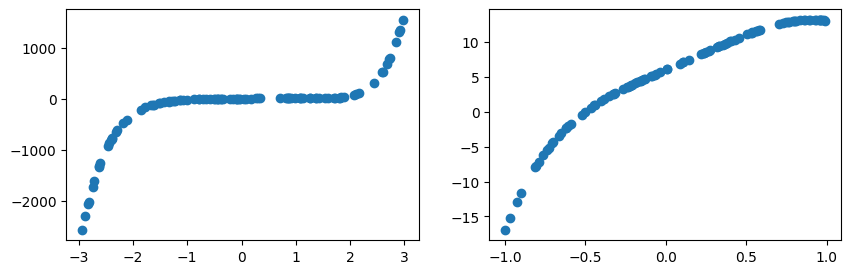

In [44]:
#Answer Q1
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
x_train = x_train[:, np.newaxis]
x = np.insert(x_train, 0, 1.0, axis=1)
x = np.insert(x_train, 0, 1.0, axis=1)

x_train = np.load("/content/x_train.npy")
x_test = np.load("/content/x_test.npy")
y_train = np.load("/content/y_train.npy")
y_test = np.load("/content/y_test.npy")

y = y_train

f = plt.figure(figsize=(10, 3))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)

ax.scatter(x_train, y_train)
ax2.scatter(x_test, y_test)



#Q1-2
a-
the plot on the left shows the relationship between the training data (x_train) and the corresponding labels (y_train), while the plot on the right shows the relationship between the testing data (x_test) and their labels (y_test). By looking at this relationship we can tell it is not linera
b-
to add non-lineartiry we do need to perform feature engineering.
c-
we can create new features to reaise the predicte value to the powers of 2, 3, and 5, representing polynomial degrees of 3rd and 5th.
d-
The functions we can try is to include the 3rd and 5th degree polynomial models, by adding features like x^2, x^3, and x^5 to the dataset

In [19]:
lr = 0.1
np.random.seed(10)
degree = 2

x_train = np.load("/content/x_train.npy")
y_train = np.load("/content/y_train.npy")
x_test = np.load("/content/x_test.npy")
y_test = np.load("/content/y_test.npy")

# Reshape x_train and x_test to 2D arrays
x_train = x_train[:, np.newaxis]  # (100,) -> (100, 1)
x_test = x_test[:, np.newaxis]    # (100,) -> (100, 1)

# Initialize random parameters for the polynomial equation
theta = np.random.rand(degree + 1)

# Add polynomial features
def add_polynomial_features(x, degree):
    x_poly = np.hstack([x ** i for i in range(1, degree + 1)])  # Generates polynomial features
    x_poly = np.insert(x_poly, 0, 1, axis=1)  # Insert bias term (ones) as the first column
    return x_poly

def gradient_descent(x, y, theta, lr, degree):
    m = len(y)
    x_poly = add_polynomial_features(x, degree)
    cost_list = []
    theta_list = []

    while True:
        prediction = np.dot(x_poly, theta)
        error = prediction - y
        cost = 1 / (2 * m) * np.dot(error.T, error)
        theta = theta - (lr / m) * np.dot(x_poly.T, error)

        cost_list.append(cost)
        theta_list.append(theta)

        if len(cost_list) > 1 and np.abs(cost_list[-2] - cost_list[-1]) < 1e-9:
            break

    return theta, cost_list, theta_list

theta, cost_list, theta_list = gradient_descent(x_train, y_train, theta, lr, degree)

x_test_poly = add_polynomial_features(x_test, degree)
y_pred = np.dot(x_test_poly, theta)

# Calculate the MSE
mse_test = ((y_pred - y_test) ** 2).mean()
print(f'The Mean Square Error (MSE) on the test data is: {mse_test}')

# Calculate the R-squared for the test data
y_mean = np.mean(y_test)
ss_tot = np.sum((y_test - y_mean) ** 2)
ss_res = np.sum((y_pred - y_mean) ** 2)
r_squared = 1 - (ss_res / ss_tot)
print(f'The R-squared value on the test data is: {r_squared}')




The Mean Square Error (MSE) on the test data is: 29078.00003834567
The R-squared value on the test data is: -614.2301874794407


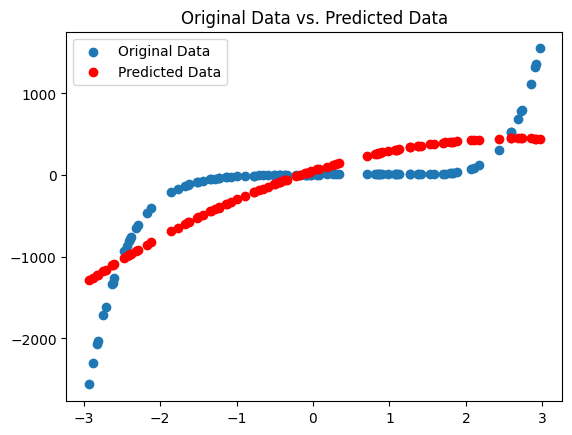

In [21]:
prediction = np.dot(add_polynomial_features(x_train, degree), theta)

plt.scatter(x_train, y_train, label='Original Data')
plt.scatter(x_train, prediction, label='Predicted Data', color='red')
plt.title('Original Data vs. Predicted Data')
plt.legend(loc='upper left')
plt.show()


In [22]:

x_train_df = pd.DataFrame(x_train)
x_train_df['x^2'] = x_train_df[0] ** 2
x_train_df['x^3'] = x_train_df[0] ** 3
x_train_enhanced = np.array(x_train_df)

x_test_df = pd.DataFrame(x_test)
x_test_df['x^2'] = x_test_df[0] ** 2
x_test_df['x^3'] = x_test_df[0] ** 3
x_test_enhanced = np.array(x_test_df)



In [23]:
def gradient_descent(X, y, lr, iterations):
    m = y.size
    # Initialize theta with a random value for each feature
    theta = np.random.rand(X.shape[1])

    cost_list = []
    for _ in range(iterations):
        predictions = np.dot(X, theta)
        error = predictions - y
        cost = (1 / (2 * m)) * np.dot(error.T, error)
        theta -= (lr / m) * np.dot(X.T, error)

        cost_list.append(cost)

    return theta, cost_list


In [24]:
lr = 0.01
iterations = 10000
theta, cost_history = gradient_descent(x_train_enhanced, y_train, lr, iterations)

print(f"Optimized theta: {theta}")


Optimized theta: [-183.76315872  -45.94693575   86.46740717]


In [25]:
# Make predictions on both training and testing data
predictions_train = np.dot(x_train_enhanced, theta)
predictions_test = np.dot(x_test_enhanced, theta)

# Calculate MSE
mse_train = np.mean((predictions_train - y_train) ** 2)
mse_test = np.mean((predictions_test - y_test) ** 2)

print(f"Training MSE: {mse_train}")
print(f"Testing MSE: {mse_test}")

# Calculate R-squared
y_bar_train = np.mean(y_train)
ss_res_train = np.sum((y_train - predictions_train) ** 2)
ss_tot_train = np.sum((y_train - y_bar_train) ** 2)
r_squared_train = 1 - (ss_res_train / ss_tot_train)

print(f"Training R-squared: {r_squared_train}")


y_bar_test = np.mean(y_test)
ss_res_test = np.sum((y_test - predictions_test) ** 2)
ss_tot_test = np.sum((y_test - y_bar_test) ** 2)
r_squared_test = 1 - (ss_res_test / ss_tot_test)

print(f"Testing R-squared: {r_squared_test}")


Training MSE: 19171.019655303164
Testing MSE: 8591.74493851313
Training R-squared: 0.955723392831118
Testing R-squared: -167.4925887480499


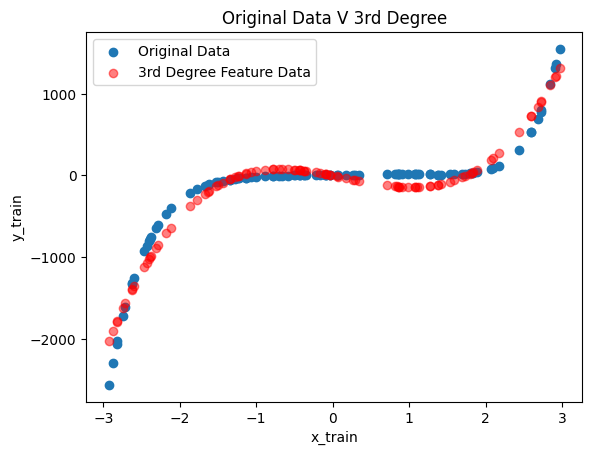

In [26]:

# Plot the original data
plt.scatter(x_train, y_train, label='Original Data')

# Plot the model predictions with 3rd degree features
plt.scatter(x_train, predictions_train, label='3rd Degree Feature Data', color='red', alpha=0.5)

plt.title('Original Data V 3rd Degree')
plt.xlabel('x_train')
plt.ylabel('y_train')
plt.legend(loc='upper left')
plt.show()



In [27]:

x_train = np.load('/content/x_train.npy')
y_train = np.load('/content/y_train.npy')
x_test = np.load('/content/x_test.npy')
y_test = np.load('/content/y_test.npy')

x_train_df = pd.DataFrame(x_train)
 # Add 2nd to 5th degree features
for i in range(2, 6):
    x_train_df[str(i)] = x_train_df[0] ** i
x_train_enhanced = np.array(x_train_df)


x_test_df = pd.DataFrame(x_test)
for i in range(2, 6):
    x_test_df[str(i)] = x_test_df[0] ** i
x_test_enhanced = np.array(x_test_df)


In [28]:
def gradient_descent(X, y, lr, iterations):
    m = y.size
    theta = np.random.rand(X.shape[1])

    cost_list = []
    for _ in range(iterations):
        predictions = X.dot(theta)
        error = predictions - y
        cost = (1 / (2 * m)) * np.dot(error.T, error)
        theta -= (lr / m) * X.T.dot(error)

        cost_list.append(cost)

    return theta, cost_list


In [29]:
lr = 0.0001
iterations = 10000
theta_optimal, cost_history = gradient_descent(x_train_enhanced, y_train, lr, iterations)
print(f'Optimal Parameters: {theta_optimal}')


Optimal Parameters: [  0.25048931   2.72879408 -25.27598109  -7.99335099  11.76931305]


In [30]:

predictions_train = x_train_enhanced.dot(theta_optimal)
predictions_test = x_test_enhanced.dot(theta_optimal)

# Calculate MSE
mse_train = np.mean((predictions_train - y_train) ** 2)
mse_test = np.mean((predictions_test - y_test) ** 2)

print(f'Training MSE: {mse_train}')
print(f'Test MSE: {mse_test}')

# Calculate R-squared
y_mean_train = np.mean(y_train)
ss_tot_train = np.sum((y_train - y_mean_train) ** 2)
ss_res_train = np.sum((predictions_train - y_train) ** 2)
r_squared_train = 1 - (ss_res_train / ss_tot_train)

print(f'Training R-squared: {r_squared_train}')


Training MSE: 1135.582810687585
Test MSE: 235.41525929371306
Training R-squared: 0.9973773041329786


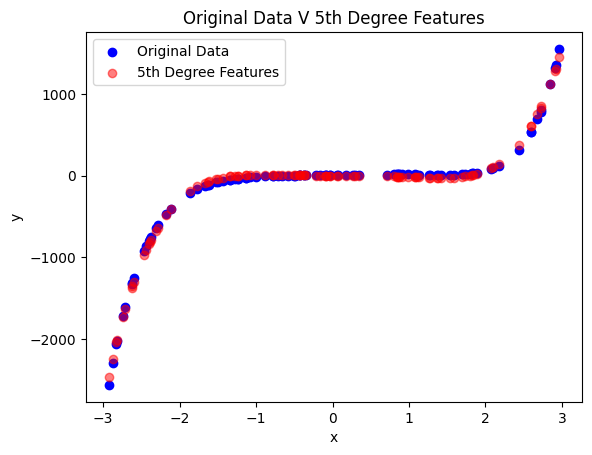

In [31]:
import matplotlib.pyplot as plt


plt.scatter(x_train, y_train, label='Original Data', color='blue')
plt.scatter(x_train, predictions_train, label='5th Degree Features', color='red', alpha=0.5)
plt.title('Original Data V 5th Degree Features')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left')
plt.show()


In [47]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

data = pd.read_excel('Housing_data_regression.xlsx')

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

mse = mean_squared_error(y, y_pred)
print(f"The average least squares error (MSE) is: {mse}")
coefficients = model.coef_
features = X.columns

for feature, coef in zip(features, coefficients):
    print(f"Feature: {feature}, Coefficient: {coef}")
max_impact_feature = features[np.argmax(np.abs(coefficients))]
min_impact_feature = features[np.argmin(np.abs(coefficients))]

print(f"The feature with the greatest impact is: {max_impact_feature}")
print(f"The feature with the least impact is: {min_impact_feature}")


The average least squares error (MSE) is: 4999836044.236564
Feature: House ID, Coefficient: 750.4102692650343
Feature: Bathrooms, Coefficient: 207537.79452519264
Feature: Land Area, Coefficient: 9557.56774842575
Feature: Living area, Coefficient: 230848.49627918177
Feature: # Garages, Coefficient: 46582.163164043806
Feature: # Rooms, Coefficient: 110282.30223539606
Feature: # Bedrooms, Coefficient: -144103.7397480485
Feature: Age of home, Coefficient: -2024.2855931844388
The feature with the greatest impact is: Living area
The feature with the least impact is: House ID


1-the average error (MSE) is around 4.99 billion
2-The feature with the biggest influence on house prices is Living area (how big the house is), with a large coefficient. This means larger houses tend to have higher prices. that make sense because Bigger living areas usually increase the value of a house. While living area alone is a good predictor, if we add it other factors like bathrooms, rooms we can improve accuracy.
3-The least important feature is House ID, which is just an identifier, so it doesn’t affect prices.
to verify it we can tell the coefficient for House ID is small, meaning it barely changes the predicted price, so removing it from the model won’t change predictions

In [48]:
import numpy as np

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [49]:
# Cost function for logistic regression
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    cost = -1/m * (np.dot(y.T, np.log(h)) + np.dot((1 - y).T, np.log(1 - h)))
    return cost


In [50]:
# Gradient descent for logistic regression
def gradient_descent(X, y, theta, lr, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        h = sigmoid(np.dot(X, theta))
        gradient = np.dot(X.T, (h - y)) / m
        theta = theta - lr * gradient
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

        # Stopping criterion
        if i > 0 and np.abs(cost_history[i-1] - cost_history[i]) < 1e-6:
            break

    return theta, cost_history


In [51]:
import matplotlib.pyplot as plt

# Function to plot decision boundary
def plot_decision_boundary(X, y, theta):
    plt.scatter(X[:, 1], y, c=y)

    # Decision boundary line
    x_values = [np.min(X[:, 1]), np.max(X[:, 1])]
    y_values = -(theta[0] + np.dot(theta[1], x_values)) / theta[2]

    plt.plot(x_values, y_values, label='Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()


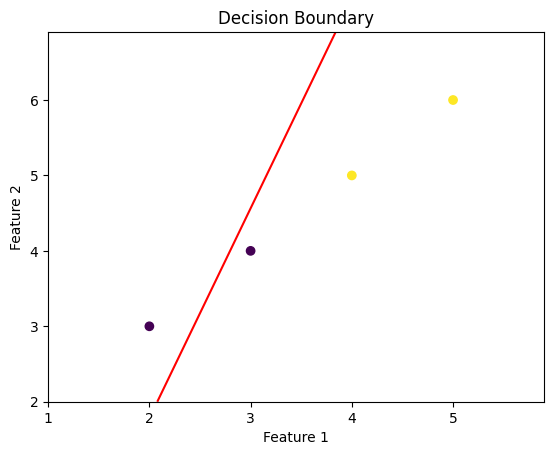

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function 3-1
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function 3-2
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    cost = -1/m * (np.dot(y.T, np.log(h)) + np.dot((1 - y).T, np.log(1 - h)))
    return cost

# Gradient descent 3-3
def gradient_descent(X, y, theta, lr, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        h = sigmoid(np.dot(X, theta))
        gradient = np.dot(X.T, (h - y)) / m
        theta = theta - lr * gradient
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)


        if i > 0 and np.abs(cost_history[i-1] - cost_history[i]) < 1e-6:
            break

    return theta, cost_history
# evalute the mode 3-4
def plot_decision_boundary(X, y, theta):
    plt.scatter(X[:, 1], X[:, 2], c=y, cmap='viridis')

    x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = sigmoid(np.dot(np.c_[np.ones((xx.ravel().shape[0], 1)), xx.ravel(), yy.ravel()], theta))
    Z = Z.reshape(xx.shape)

    plt.contour(xx, yy, Z, levels=[0.5], colors='red')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.show()


X = np.array([[1, 2, 3], [1, 3, 4], [1, 4, 5], [1, 5, 6]])
y = np.array([0, 0, 1, 1])

theta = np.zeros(X.shape[1])
lr = 0.01
iterations = 1000


theta, cost_history = gradient_descent(X, y, theta, lr, iterations)

# Plot decision boundary
plot_decision_boundary(X, y, theta)


Q3-1
The sigmoid function is critical in logistic regression  because it converts the output of a linear equation into a probability, which is a value between 0 and 1, The output of the sigmoid function represents the probability that a particular input belongs to the positive class . If the output is greater than 0.5, we classify it as class 1 , and if it's less than 0.5, we classify it as class 0 .
Q3-2
Linear regression predicts numbers (e.g., house prices).
Logistic regression predicts a class (e.g., tumor is malignant or benign).
Output:
Linear regression gives continuous values.
Logistic regression gives probabilities (between 0 and 1).
Cost function:
Linear regression uses Mean Squared Error.
Logistic regression uses a log-likelihood (cross-entropy), focusing on classification errors.
Q3-3
One-vs-All (OvA): Train separate models for each class. Each model checks if an item belongs to that class or not.
Softmax Regression: Assigns probabilities to multiple classes and picks the one with the highest probability.